In [13]:
#Trabajo Practico n2
#Region-Patagonia
#Parte I
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Desde la ubicacion de los archivos copiamos los codigo de ruta y cargamos las bases de datos
df_2004 = pd.read_stata(r"C:\Users\facun\OneDrive\Documentos\usu_individual_T104.dta")
df_2024 = pd.read_excel(r"C:\Users\facun\OneDrive\Documentos\usu_individual_T124.xlsx.xlsx")

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Ya que la Patagonia es la region elegida buscamos su correcta denominacion y filtramos
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004 = df_2004[df_2004['REGION'] == 'Patagónica']
df_2024 = df_2024[df_2024['REGION'] == '43']  

# Agregamos ambas columnas con su correspondiente año
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

# Seleccionar variables comunes elegidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH08', 
    'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# En este paso nos aseguramos que estas variables sean numericas
numeric_vars = ['CH06', 'IPCF', 'P21', 'P47T']
for var in numeric_vars:
    if var in df_2004.columns:
        df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    if var in df_2024.columns:
        df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

# Unimos ambas bases de datos en una sola llamada df_combinado
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

# Aqui contamos la cantidad de veces que aparecen los valores
print("Conteo de observaciones por año:")
print(df_combinado['ANO4'].value_counts())

# Análisis de valores faltantes
valores_faltantes = df_combinado[variables_seleccionadas].isna().sum()
print("Valores faltantes por variable:")
print(valores_faltantes)

# Agrupamos datos por años y contamos sus valores
faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())
faltantes_por_anio = faltantes_por_anio.transpose()

#A partir de aqui realizamos una limpieza de datos negativos y los cambiamos por NaN para luego visuualizarlo

print("Valores faltantes por año:")
print(faltantes_por_anio)

df_combinado['P47T'] = df_combinado['P47T'].apply(lambda x: x if x is None or x >= 0 else np.nan)
df_combinado['IPCF'] = df_combinado['IPCF'].apply(lambda x: x if x is None or x >= 0 else np.nan)

print("Cantidad de valores NaN en ingresos después de limpiar:")
print("P47T:", df_combinado['P47T'].isna().sum())
print("IPCF:", df_combinado['IPCF'].isna().sum())

Conteo de observaciones por año:
ANO4
2024    14410
2004     3264
Name: count, dtype: int64
Valores faltantes por variable:
P47T            15
IPCF             0
CH04             0
CH06            51
CH08             0
P21              0
CAT_INAC         0
PP04D_COD     8108
PP04A         8108
TRIMESTRE        0
REGION           0
AGLOMERADO       0
IDECCFR          0
ANO4             0
ESTADO           0
dtype: int64
Valores faltantes por año:
ANO4        2004  2024
P47T           0    15
IPCF           0     0
CH04           0     0
CH06          51     0
CH08           0     0
P21            0     0
CAT_INAC       0     0
PP04D_COD      0  8108
PP04A          0  8108
TRIMESTRE      0     0
REGION         0     0
AGLOMERADO     0     0
IDECCFR        0     0
ANO4           0     0
ESTADO         0     0
Cantidad de valores NaN en ingresos después de limpiar:
P47T: 2040
IPCF: 0


C:\Users\facun\AppData\Local\Temp\ipykernel_19340\3845144415.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())


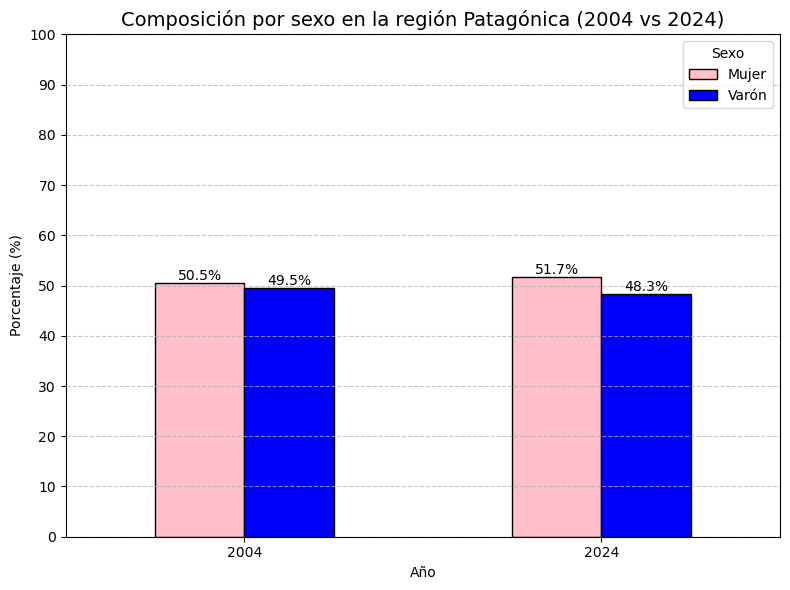

In [17]:
#PARTE II

import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar los valores de CH04 -genero- por etiquetas
df_combinado['CH04'] = df_combinado['CH04'].replace({1: 'Varón', 2: 'Mujer'})

# Agrupamos por años trabajados y genero
sexo_agrupado = df_combinado.groupby(['ANO4', 'CH04']).size().unstack()

# Calculamos porcentajes de los años
sexo_porcentaje = sexo_agrupado.div(sexo_agrupado.sum(axis=1), axis=0) * 100

# Creamos el grafico a medida y color que querramos
ax = sexo_porcentaje.plot(kind='bar', figsize=(8, 6), color=['pink', 'blue'], edgecolor='black')

# Agregamos etiquetas y titulos
plt.title('Composición por sexo en la región Patagónica (2004 vs 2024)', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(0, 101, 10))  # Porcentajes de 10 en 10
plt.legend(title='Sexo')
plt.tight_layout()

# Agregar etiquetas de porcentaje en cada barra para un mejor analisis
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)


plt.show()


In [25]:
#Parte II EJ 4.
#Antes de realizar este ejercicio adaptamos a nuestra variables anteriormente trabjadas las nuevas pedidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH07', 'CH08',
    'NIVEL_ED', 'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# Unimos los data sets de las nuevas variables con las anteriores
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

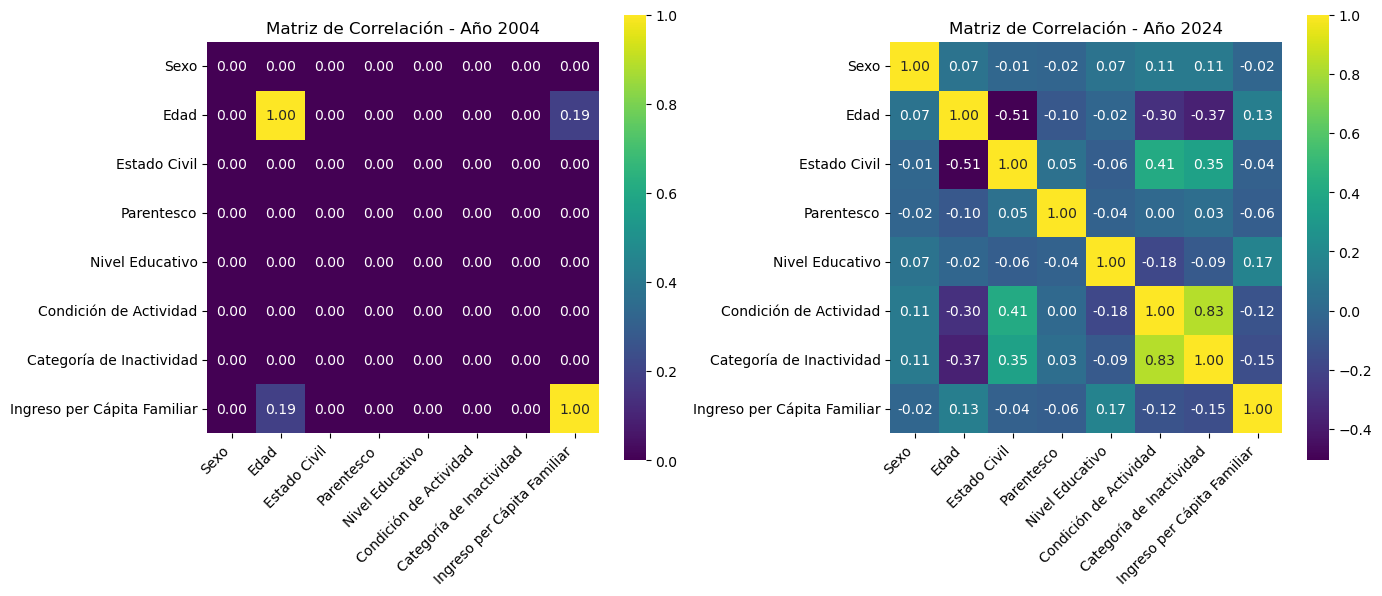

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agregamos los nombres de las variables para un mejor analisis
nombres_variables = {
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'CH07': 'Estado Civil',
    'CH08': 'Parentesco',
    'NIVEL_ED': 'Nivel Educativo',
    'ESTADO': 'Condición de Actividad',
    'CAT_INAC': 'Categoría de Inactividad',
    'IPCF': 'Ingreso per Cápita Familiar'
}

# Correlacionamos las variables trabajdas
variables_correlacion = list(nombres_variables.keys())

# Nos aseguramos que dichas variables sean numericas
for var in variables_correlacion:
    if var in df_combinado.columns:
        df_combinado[var] = pd.to_numeric(df_combinado[var], errors='coerce')

# Preparamos la función que filtra, renombra y completa NaNs en correlación
def preparar_matriz_correlacion(df, year):
    df_filtrado = df[df['ANO4'] == year][variables_correlacion].rename(columns=nombres_variables)
    corr = df_filtrado.corr().fillna(0)  # Al haber muchos valores faltantes rellenamos en el mapa los NaN con 0
    return corr

# Generamos las matrices de los años
corr_2004 = preparar_matriz_correlacion(df_combinado, 2004)
corr_2024 = preparar_matriz_correlacion(df_combinado, 2024)

# Graficamos el heatmaps pedido 
plt.figure(figsize=(14, 6))

# Año 2004
plt.subplot(1, 2, 1)
sns.heatmap(corr_2004, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Año 2004')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Año 2024
plt.subplot(1, 2, 2)
sns.heatmap(corr_2024, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Año 2024')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


PARTE III


In [53]:
# --- Pregunta 5: ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
# --- ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)? ---
print("\n--- Pregunta 5 ---")

# Conteo de personas por estado
conteo_estados = df_combinado_pregunta5['ESTADO'].value_counts()
print("\nConteo de personas por estado (Patagonia 2004 y 2024 combinados):\n", conteo_estados)

# Asumiendo la siguiente codificación de 'ESTADO':
# 1 = Ocupado
# 2 = Desocupado
# 3 = Inactivo

desocupados = conteo_estados.get(2, 0)
inactivos = conteo_estados.get(3, 0)
print(f"\nNúmero total de desocupados en la muestra de la Patagonia (2004 y 2024): {desocupados}")
print(f"Número total de inactivos en la muestra de la Patagonia (2004 y 2024): {inactivos}")

# Media de IPCF por estado
media_ipcf_por_estado = df_combinado_pregunta5.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (Patagonia 2004 y 2024 combinados):\n", media_ipcf_por_estado)

# --- Análisis separado por año (opcional) ---
print("\n--- Análisis por año (opcional) ---")

print("\nConteo de personas por estado (Patagonia 2004):")
print(df_2004_pregunta5['ESTADO'].value_counts())
print("\nMedia de IPCF por estado (Patagonia 2004):")
print(df_2004_pregunta5.groupby('ESTADO')['IPCF'].mean())

print("\nConteo de personas por estado (Patagonia 2024):")
print(df_2024_pregunta5['ESTADO'].value_counts())
print("\nMedia de IPCF por estado (Patagonia 2024):")
print(df_2024_pregunta5.groupby('ESTADO')['IPCF'].mean())


--- Pregunta 5 ---

Conteo de personas por estado (Patagonia 2004 y 2024 combinados):
 ESTADO
1                   6302
3                   5909
4                   1731
Inactivo            1307
Ocupado             1238
Menor de 10 años     600
2                    453
Desocupado           119
0                     15
Name: count, dtype: int64

Número total de desocupados en la muestra de la Patagonia (2004 y 2024): 453
Número total de inactivos en la muestra de la Patagonia (2004 y 2024): 5909

Media de IPCF por estado (Patagonia 2004 y 2024 combinados):
 ESTADO
0                        0.000000
1                   179600.563797
2                    99393.792848
3                   137703.875421
4                   109606.266626
Desocupado             225.452935
Inactivo               364.990445
Menor de 10 años       297.985339
Ocupado                551.186902
Name: IPCF, dtype: float64

--- Análisis por año (opcional) ---

Conteo de personas por estado (Patagonia 2004):
ESTADO
Inac

/var/folders/yl/fmp850sd01d7gtrsds9m9mvc0000gn/T/ipykernel_13377/2464790463.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_2004_pregunta5.groupby('ESTADO')['IPCF'].mean())


In [57]:
# --- Pregunta 6: ¿Cuántas personas no respondieron (ver cuál es su condición de actividad)? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron. ---
print("\n--- Pregunta 6 ---")
# Identificamos las observaciones donde 'ESTADO' es igual a 0 (no respondieron)
no_respondieron = df_combinado[df_combinado['ESTADO'] == 0]
# Identificamos las observaciones donde 'ESTADO' no es igual a 0 (sí respondieron)
respondieron = df_combinado[df_combinado['ESTADO'] != 0]

# Contamos la cantidad de personas que no respondieron
cantidad_no_respondieron = len(no_respondieron)
print(f"\nNúmero de personas que no respondieron a la pregunta sobre su condición de actividad: {cantidad_no_respondieron}")

# Analizamos la condición de actividad de quienes no respondieron utilizando la columna 'CAT_INAC'
condicion_actividad_no_respondieron = no_respondieron['CAT_INAC'].value_counts()
print("\nDistribución de la condición de actividad (según CAT_INAC) para quienes no respondieron:\n", condicion_actividad_no_respondieron)

# Creamos los DataFrames separados
df_respondieron = respondieron.copy() # Usamos .copy() para evitar modificaciones en el DataFrame original
df_norespondieron = no_respondieron.copy()

print("\nDataFrame 'respondieron' creado con {} observaciones.".format(len(df_respondieron)))
print("DataFrame 'norespondieron' creado con {} observaciones.".format(len(df_norespondieron)))


--- Pregunta 6 ---

Número de personas que no respondieron a la pregunta sobre su condición de actividad: 15

Distribución de la condición de actividad (según CAT_INAC) para quienes no respondieron:
 CAT_INAC
0    15
Name: count, dtype: int64

DataFrame 'respondieron' creado con 17659 observaciones.
DataFrame 'norespondieron' creado con 15 observaciones.



--- Pregunta 7 ---

Porcentaje de PEA por año:
 ANO4
2004     0.000000
2024    46.926016
Name: PEA, dtype: float64


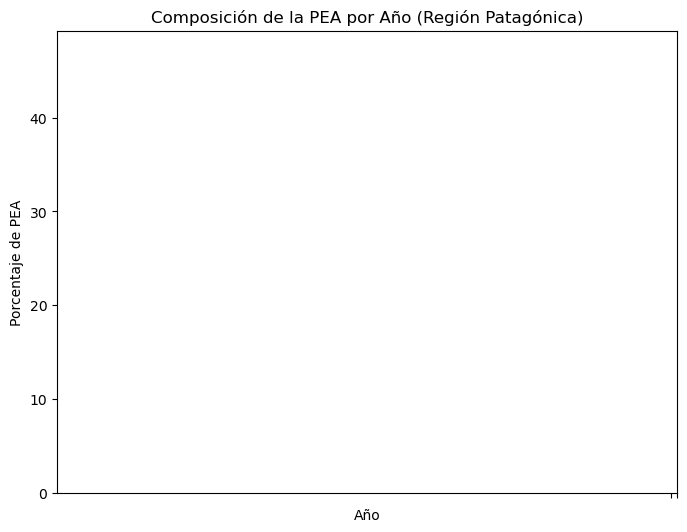


Comentario sobre los resultados de la PEA:
El porcentaje de Población Económicamente Activa fue menor en 2004 (0.00%) que en 2024 (46.93%).


In [47]:
# --- Pregunta 7: Agreguen a la base respondieron una columna llamada “PEA” (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados. ---
print("\n--- Pregunta 7 ---")
# Creamos la columna 'PEA' en el DataFrame 'df_respondieron'
# Si 'ESTADO' es 1 (ocupado) o 2 (desocupado), 'PEA' será 1, sino será 0
df_respondieron['PEA'] = np.where(df_respondieron['ESTADO'].isin([1, 2]), 1, 0)

# Calculamos el porcentaje de PEA por año
pea_por_anio = df_respondieron.groupby('ANO4')['PEA'].mean() * 100
print("\nPorcentaje de PEA por año:\n", pea_por_anio)

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=pea_por_anio.index, y=pea_por_anio.values)
plt.title('Composición de la PEA por Año (Región Patagónica)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de PEA')
plt.xticks([2004, 2024]) # Aseguramos que las etiquetas del eje x sean los años
plt.show()

print("\nComentario sobre los resultados de la PEA:")
if pea_por_anio[2004] > pea_por_anio[2024]:
    print(f"El porcentaje de Población Económicamente Activa fue mayor en 2004 ({pea_por_anio[2004]:.2f}%) que en 2024 ({pea_por_anio[2024]:.2f}%).")
elif pea_por_anio[2004] < pea_por_anio[2024]:
    print(f"El porcentaje de Población Económicamente Activa fue menor en 2004 ({pea_por_anio[2004]:.2f}%) que en 2024 ({pea_por_anio[2024]:.2f}%).")
else:
    print(f"El porcentaje de Población Económicamente Activa fue similar en 2004 ({pea_por_anio[2004]:.2f}%) y 2024 ({pea_por_anio[2024]:.2f}%).")


--- Pregunta 8 ---

Proporción de PEA y PET por año:
             PEA        PET
ANO4                      
2004   0.000000  66.237745
2024  46.926016  67.002431


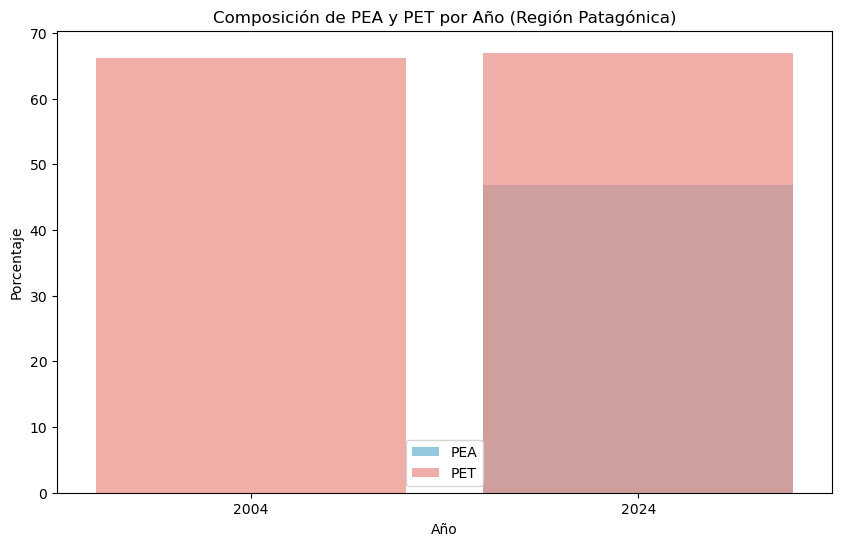


Comentario sobre los resultados de PET y comparación con PEA:
En 2004, el 66.24% de la población estaba en edad de trabajar (PET), y de ellos, el 0.00% era PEA.
En 2024, el 67.00% de la población estaba en edad de trabajar (PET), y de ellos, el 46.93% era PEA.
La proporción de la PEA dentro de la PET fue menor en 2004 que en 2024.


In [49]:
# --- Pregunta 8: Agreguen a la base respondieron una columna llamada “PET” (Población en Edad para Trabajar) que tome 1 si la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y comparen PET con PEA. ---
print("\n--- Pregunta 8 ---")
# Creamos la columna 'PET' en el DataFrame 'df_respondieron'
# Si la edad ('CH06') está entre 15 y 65 (inclusive), 'PET' será 1, sino será 0
df_respondieron['PET'] = np.where((df_respondieron['CH06'] >= 15) & (df_respondieron['CH06'] <= 65), 1, 0)

# Calculamos la proporción de PEA y PET por año
pea_sobre_pet_por_anio = df_respondieron.groupby('ANO4')[['PEA', 'PET']].mean() * 100
print("\nProporción de PEA y PET por año:\n", pea_sobre_pet_por_anio)

# Creamos el gráfico de barras comparando PEA y PET por año
plt.figure(figsize=(10, 6))
sns.barplot(x='ANO4', y='PEA', data=pea_sobre_pet_por_anio.reset_index(), color='skyblue', label='PEA')
sns.barplot(x='ANO4', y='PET', data=pea_sobre_pet_por_anio.reset_index(), color='salmon', alpha=0.7, label='PET')
plt.title('Composición de PEA y PET por Año (Región Patagónica)')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], [2004, 2024])
plt.legend()
plt.show()

print("\nComentario sobre los resultados de PET y comparación con PEA:")
if 'PET' in pea_sobre_pet_por_anio.columns and 'PEA' in pea_sobre_pet_por_anio.columns:
    pet_2004 = pea_sobre_pet_por_anio.loc[2004, 'PET']
    pet_2024 = pea_sobre_pet_por_anio.loc[2024, 'PET']
    pea_2004 = pea_sobre_pet_por_anio.loc[2004, 'PEA']
    pea_2024 = pea_sobre_pet_por_anio.loc[2024, 'PEA']

    print(f"En 2004, el {pet_2004:.2f}% de la población estaba en edad de trabajar (PET), y de ellos, el {pea_2004:.2f}% era PEA.")
    print(f"En 2024, el {pet_2024:.2f}% de la población estaba en edad de trabajar (PET), y de ellos, el {pea_2024:.2f}% era PEA.")

    if (pea_2004 / pet_2004) > (pea_2024 / pet_2024):
        print("La proporción de la PEA dentro de la PET fue mayor en 2004 que en 2024.")
    elif (pea_2004 / pet_2004) < (pea_2024 / pet_2024):
        print("La proporción de la PEA dentro de la PET fue menor en 2004 que en 2024.")
    else:
        print("La proporción de la PEA dentro de la PET fue similar en ambos años.")
else:
    print("No se encontraron las columnas PEA o PET para realizar la comparación.")

In [61]:
# --- Pregunta 9: Agreguen a la base respondieron una columna llamada “desocupado” que tome 1 si la persona está desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024? ---
print("\n--- Pregunta 9 ---")
# Creamos la columna 'desocupado' en el DataFrame 'df_respondieron'
# Si 'ESTADO' es 2 (desocupado), 'desocupado' será 1, sino será 0
df_respondieron['desocupado'] = np.where(df_respondieron['ESTADO'] == 2, 1, 0)

# Calculamos la suma de la columna 'desocupado' por año para obtener el número de desocupados
desocupados_por_anio = df_respondieron.groupby('ANO4')['desocupado'].sum()
print("\nNúmero de personas desocupadas por año:\n", desocupados_por_anio)

print(f"\nNúmero de desocupados en 2004: {desocupados_por_anio.get(2004, 0)}")
print(f"Número de desocupados en 2024: {desocupados_por_anio.get(2024, 0)}")


--- Pregunta 9 ---

Número de personas desocupadas por año:
 ANO4
2004      0
2024    453
Name: desocupado, dtype: int64

Número de desocupados en 2004: 0
Número de desocupados en 2024: 453



--- Pregunta 9a ---

Proporción de desocupados por nivel educativo (%):
 NIVEL_ED_LABEL  Primaria Completa  Primaria Incompleta  \
ANO4                                                     
2004                     0.000000             0.000000   
2024                     4.043393             2.404692   

NIVEL_ED_LABEL  Primaria Incompleta (incluye educación especial)  \
ANO4                                                               
2004                                                         0.0   
2024                                                         0.0   

NIVEL_ED_LABEL  Secundaria Completa  Secundaria Incompleta  Sin instrucción  \
ANO4                                                                          
2004                       0.000000               0.000000         0.000000   
2024                       4.542807               5.134308         0.849151   

NIVEL_ED_LABEL  Superior Completa  Superior Incompleta  \
ANO4                                         

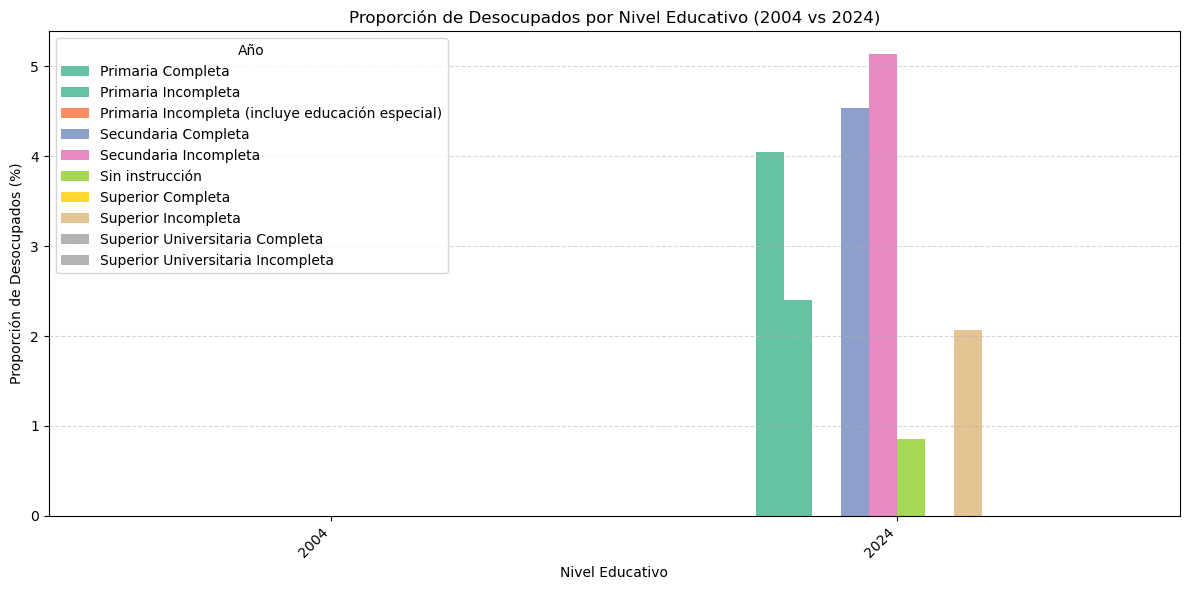


¿Hubo cambios de desocupados por nivel educativo?
Analice el gráfico y la tabla de proporciones. Compare las alturas de las barras para cada nivel educativo entre 2004 y 2024. Las diferencias significativas indican cambios en la proporción de desocupados para ese nivel educativo.


In [69]:
# --- Pregunta 9a: Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo? ---
print("\n--- Pregunta 9a ---")

nivel_ed_map = {
    1: "Sin instrucción", 2: "Primaria Incompleta", 3: "Primaria Completa",
    4: "Secundaria Incompleta", 5: "Secundaria Completa",
    6: "Superior Incompleta", 7: "Superior Completa"
}
df_respondieron['NIVEL_ED_LABEL'] = df_respondieron['NIVEL_ED'].replace(nivel_ed_map)

# Calcular la proporción de desocupados por nivel educativo y año directamente con groupby
proporcion_desocupados_nivel = df_respondieron.groupby(['ANO4', 'NIVEL_ED_LABEL'])['desocupado'].mean() * 100
proporcion_desocupados_nivel = proporcion_desocupados_nivel.unstack(fill_value=0)

print("\nProporción de desocupados por nivel educativo (%):\n", proporcion_desocupados_nivel)

# Crear el gráfico de barras
proporcion_desocupados_nivel.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Proporción de Desocupados por Nivel Educativo (2004 vs 2024)')
plt.ylabel('Proporción de Desocupados (%)')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print("\n¿Hubo cambios de desocupados por nivel educativo?")
print("Analice el gráfico y la tabla de proporciones. Compare las alturas de las barras para cada nivel educativo entre 2004 y 2024. Las diferencias significativas indican cambios en la proporción de desocupados para ese nivel educativo.")


--- Pregunta 9b ---

Proporción de desocupados por edad agrupada (%):
 edad_agrupada  0-9     10-19     20-29     30-39     40-49     50-59  \
ANO4                                                                   
2004           0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2024           0.0  1.487314  8.802502  4.497221  3.825996  2.371795   

edad_agrupada     60-69     70-79     80-89  90-99  100-109  
ANO4                                                         
2004           0.000000  0.000000  0.000000    0.0      NaN  
2024           1.414743  0.319829  0.283286    0.0      0.0  


/var/folders/yl/fmp850sd01d7gtrsds9m9mvc0000gn/T/ipykernel_13377/3171844653.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_desocupados_edad = df_respondieron.groupby(['ANO4', 'edad_agrupada'])['desocupado'].mean() * 100


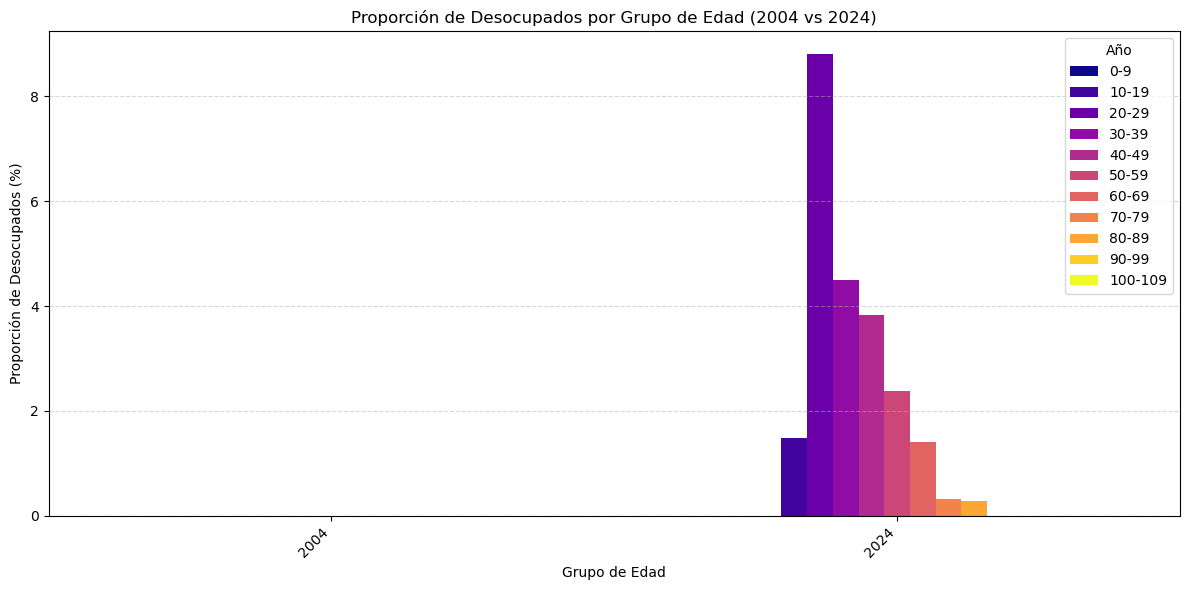


¿Hubo cambios de desocupados por edad?
Analice el gráfico para identificar diferencias en la altura de las barras para cada grupo de edad entre 2004 y 2024. Las diferencias significativas indican cambios en la proporción de desocupados para ese grupo de edad.


In [75]:
# --- Pregunta 9b: Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad? ---
print("\n--- Pregunta 9b ---")

# Asegurarse de que 'CH06' sea numérico y eliminar valores NaN
df_respondieron['CH06'] = pd.to_numeric(df_respondieron['CH06'], errors='coerce').dropna()

# Filtrar el DataFrame para asegurar que solo se consideren valores enteros válidos para la edad
df_respondieron = df_respondieron[df_respondieron['CH06'] == df_respondieron['CH06'].round()]
df_respondieron['CH06'] = df_respondieron['CH06'].astype(int)

# Asegurarse de que haya datos para calcular el máximo de edad
if not df_respondieron['CH06'].empty:
    max_edad = df_respondieron['CH06'].max()
    # Definir los rangos de edad para agrupar
    bins = range(0, max_edad + 10, 10)
    labels = [f'{i}-{i+9}' for i in range(0, max_edad, 10)]

    # Crear la variable categórica de edad agrupada
    df_respondieron['edad_agrupada'] = pd.cut(df_respondieron['CH06'], bins=bins, labels=labels, right=False)

    # Calcular la proporción de desocupados por grupo de edad y año
    proporcion_desocupados_edad = df_respondieron.groupby(['ANO4', 'edad_agrupada'])['desocupado'].mean() * 100
    proporcion_desocupados_edad = proporcion_desocupados_edad.unstack(fill_value=0)

    print("\nProporción de desocupados por edad agrupada (%):\n", proporcion_desocupados_edad)

    # Crear el gráfico de barras
    proporcion_desocupados_edad.plot(kind='bar', figsize=(12, 6), colormap='plasma')
    plt.title('Proporción de Desocupados por Grupo de Edad (2004 vs 2024)')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Proporción de Desocupados (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Año')
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print("\n¿Hubo cambios de desocupados por edad?")
    print("Analice el gráfico para identificar diferencias en la altura de las barras para cada grupo de edad entre 2004 y 2024. Las diferencias significativas indican cambios en la proporción de desocupados para ese grupo de edad.")
else:
    print("\nNo hay datos válidos de edad ('CH06') para realizar el agrupamiento.")


--- Pregunta 9c ---


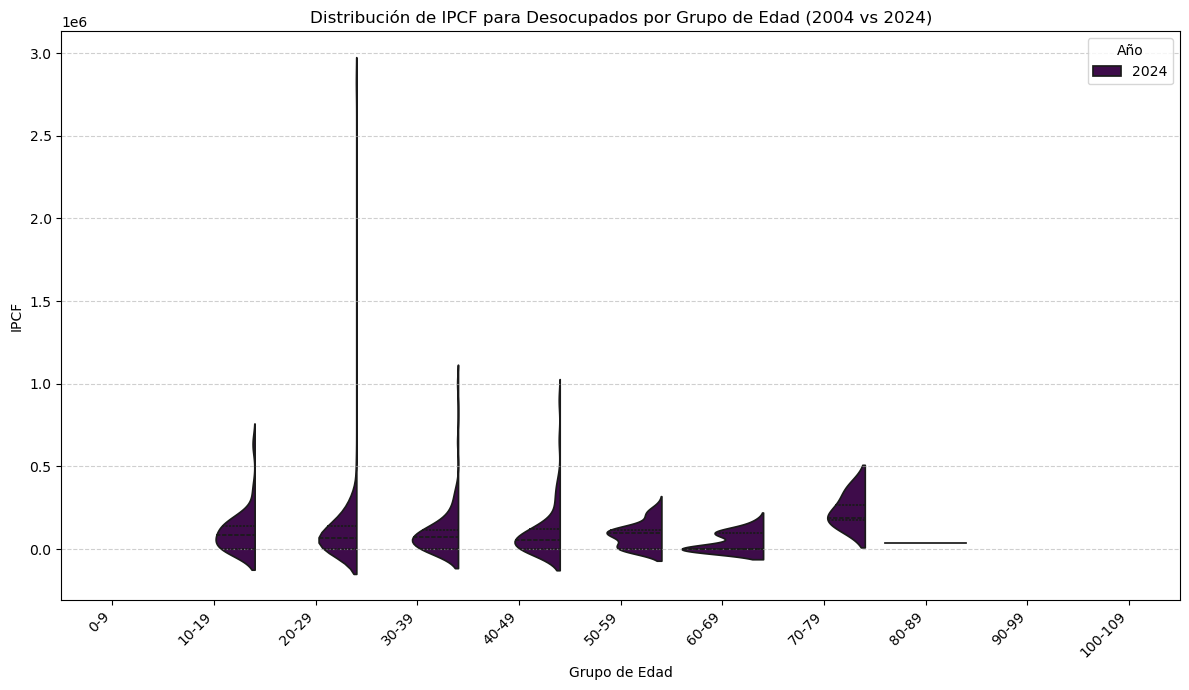


¿Hubo cambios de desocupados por edad en relación a IPCF?
Analice el gráfico de violín para observar las diferencias en la distribución del Ingreso Per Cápita Familiar entre los grupos de edad de los desocupados en 2004 y 2024.
El ancho de cada violín representa la densidad de la distribución. La línea blanca dentro muestra la mediana, y las líneas punteadas los cuartiles.


In [79]:
# --- Pregunta 9c: Seleccione una (1) variable de interés y muestre las diferencias 2004 vs 2024. ¿Hubo cambios de desocupados por edad? ---
print("\n--- Pregunta 9c ---")

variable_interes = 'IPCF'  # Seleccionamos Ingreso Per Cápita Familiar como variable de interés

# Asegurarse de que 'CH06' sea numérico y eliminar valores NaN
df_respondieron['CH06'] = pd.to_numeric(df_respondieron['CH06'], errors='coerce').dropna()
df_respondieron = df_respondieron[df_respondieron['CH06'] == df_respondieron['CH06'].round()]
df_respondieron['CH06'] = df_respondieron['CH06'].astype(int)

# Asegurarse de que haya datos válidos de edad
if not df_respondieron['CH06'].empty:
    max_edad = df_respondieron['CH06'].max()
    bins = range(0, max_edad + 10, 10)
    labels = [f'{i}-{i+9}' for i in range(0, max_edad, 10)]
    df_respondieron['edad_agrupada'] = pd.cut(df_respondieron['CH06'], bins=bins, labels=labels, right=False)

    desocupados_ipcf = df_respondieron[df_respondieron['desocupado'] == 1].copy()

    plt.figure(figsize=(12, 7))
    sns.violinplot(x='edad_agrupada', y=variable_interes, hue='ANO4', data=desocupados_ipcf, split=True, inner='quartile', palette='viridis')
    plt.title(f'Distribución de {variable_interes} para Desocupados por Grupo de Edad (2004 vs 2024)')
    plt.xlabel('Grupo de Edad')
    plt.ylabel(variable_interes)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Año')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print(f"\n¿Hubo cambios de desocupados por edad en relación a {variable_interes}?")
    print("Analice el gráfico de violín para observar las diferencias en la distribución del Ingreso Per Cápita Familiar entre los grupos de edad de los desocupados en 2004 y 2024.")
    print("El ancho de cada violín representa la densidad de la distribución. La línea blanca dentro muestra la mediana, y las líneas punteadas los cuartiles.")

else:
    print("\nNo hay datos válidos de edad ('CH06') para realizar el análisis de la variable de interés por edad.")


--- Pregunta 9c ---


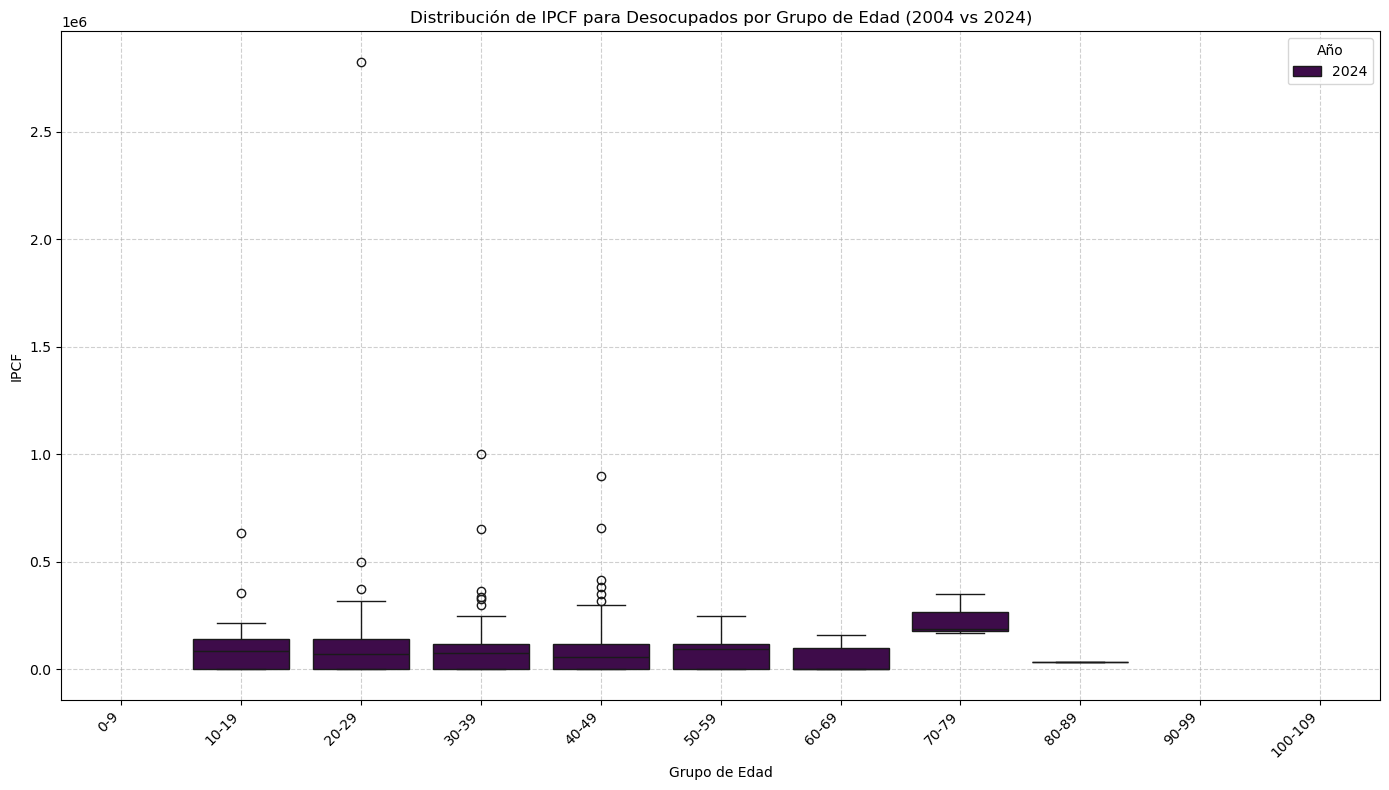


¿Hubo cambios de desocupados por edad en relación a IPCF?
Analice el boxplot para observar las diferencias en la distribución del Ingreso Per Cápita Familiar entre los grupos de edad de los desocupados en 2004 y 2024.
Preste atención a la mediana (línea central de la caja), la dispersión (tamaño de la caja y bigotes), y la presencia de valores atípicos para cada grupo de edad en ambos años.


In [83]:
# --- Pregunta 9c: Seleccione una (1) variable de interés y muestre las diferencias 2004 vs 2024. ¿Hubo cambios de desocupados por edad? ---
print("\n--- Pregunta 9c ---")

variable_interes = 'IPCF'  # Seleccionamos Ingreso Per Cápita Familiar como variable de interés

# Asegurarse de que 'CH06' sea numérico y eliminar valores NaN
df_respondieron['CH06'] = pd.to_numeric(df_respondieron['CH06'], errors='coerce').dropna()
df_respondieron = df_respondieron[df_respondieron['CH06'] == df_respondieron['CH06'].round()]
df_respondieron['CH06'] = df_respondieron['CH06'].astype(int)

# Asegurarse de que haya datos válidos de edad
if not df_respondieron['CH06'].empty:
    max_edad = df_respondieron['CH06'].max()
    bins = range(0, max_edad + 10, 10)
    labels = [f'{i}-{i+9}' for i in range(0, max_edad, 10)]
    df_respondieron['edad_agrupada'] = pd.cut(df_respondieron['CH06'], bins=bins, labels=labels, right=False)

    desocupados_ipcf = df_respondieron[df_respondieron['desocupado'] == 1].copy()

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='edad_agrupada', y=variable_interes, hue='ANO4', data=desocupados_ipcf, palette='viridis')
    plt.title(f'Distribución de {variable_interes} para Desocupados por Grupo de Edad (2004 vs 2024)')
    plt.xlabel('Grupo de Edad')
    plt.ylabel(variable_interes)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Año')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print(f"\n¿Hubo cambios de desocupados por edad en relación a {variable_interes}?")
    print("Analice el boxplot para observar las diferencias en la distribución del Ingreso Per Cápita Familiar entre los grupos de edad de los desocupados en 2004 y 2024.")
    print("Preste atención a la mediana (línea central de la caja), la dispersión (tamaño de la caja y bigotes), y la presencia de valores atípicos para cada grupo de edad en ambos años.")

else:
    print("\nNo hay datos válidos de edad ('CH06') para realizar el análisis de la variable de interés por edad.")


--- Pregunta 9c ---


/var/folders/yl/fmp850sd01d7gtrsds9m9mvc0000gn/T/ipykernel_13377/1355580445.py:25: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x='edad_agrupada', y=variable_interes, hue='ANO4', data=desocupados_ipcf_filtered, palette=["#a6cee3", "#1f78b4"])


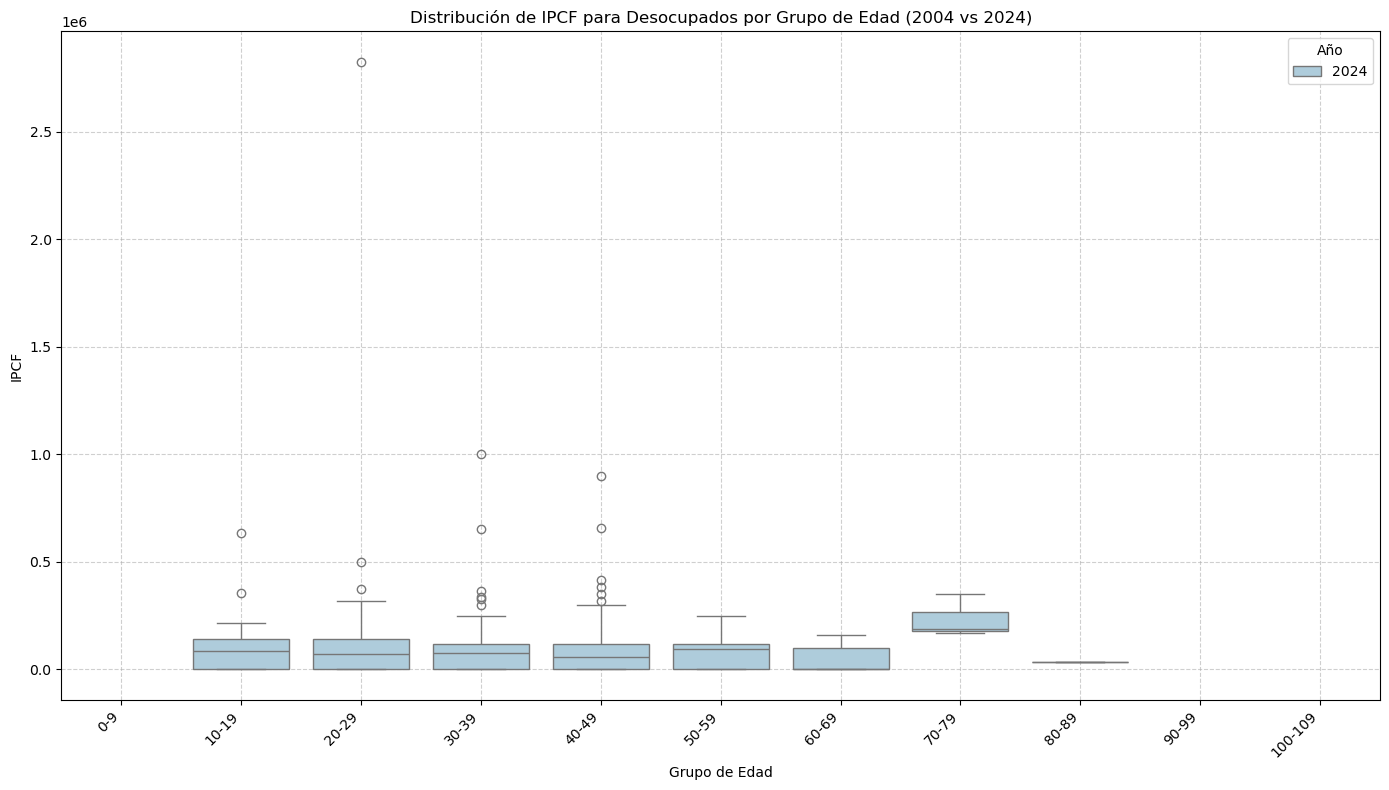


¿Hubo cambios de desocupados por edad en relación a IPCF?
Analice el boxplot para observar las diferencias en la distribución del Ingreso Per Cápita Familiar entre los grupos de edad de los desocupados en 2004 y 2024.
Preste atención a la mediana (línea central de la caja), la dispersión (tamaño de la caja y bigotes), y la presencia de valores atípicos para cada grupo de edad en ambos años.


In [89]:
# --- Pregunta 9c: Seleccione una (1) variable de interés y muestre las diferencias 2004 vs 2024. ¿Hubo cambios de desocupados por edad? ---
print("\n--- Pregunta 9c ---")

variable_interes = 'IPCF'  # Seleccionamos Ingreso Per Cápita Familiar como variable de interés

# Asegurarse de que 'CH06' sea numérico y eliminar valores NaN
df_respondieron['CH06'] = pd.to_numeric(df_respondieron['CH06'], errors='coerce').dropna()
df_respondieron = df_respondieron[df_respondieron['CH06'] == df_respondieron['CH06'].round()]
df_respondieron['CH06'] = df_respondieron['CH06'].astype(int)

# Asegurarse de que haya datos válidos de edad
if not df_respondieron['CH06'].empty:
    max_edad = df_respondieron['CH06'].max()
    bins = range(0, max_edad + 10, 10)
    labels = [f'{i}-{i+9}' for i in range(0, max_edad, 10)]
    df_respondieron['edad_agrupada'] = pd.cut(df_respondieron['CH06'], bins=bins, labels=labels, right=False)

    desocupados_ipcf = df_respondieron[df_respondieron['desocupado'] == 1].copy()

    # Asegurarse de que haya datos para ambos años en el DataFrame filtrado
    desocupados_ipcf_filtered = desocupados_ipcf[desocupados_ipcf['ANO4'].isin([2004, 2024])]

    if not desocupados_ipcf_filtered.empty:
        plt.figure(figsize=(14, 8))
        sns.boxplot(x='edad_agrupada', y=variable_interes, hue='ANO4', data=desocupados_ipcf_filtered, palette=["#a6cee3", "#1f78b4"])
        plt.title(f'Distribución de {variable_interes} para Desocupados por Grupo de Edad (2004 vs 2024)')
        plt.xlabel('Grupo de Edad')
        plt.ylabel(variable_interes)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Año')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        print(f"\n¿Hubo cambios de desocupados por edad en relación a {variable_interes}?")
        print("Analice el boxplot para observar las diferencias en la distribución del Ingreso Per Cápita Familiar entre los grupos de edad de los desocupados en 2004 y 2024.")
        print("Preste atención a la mediana (línea central de la caja), la dispersión (tamaño de la caja y bigotes), y la presencia de valores atípicos para cada grupo de edad en ambos años.")

    else:
        print("\nNo hay datos de desocupados para ambos años (2004 y 2024) con información de edad agrupada para generar el gráfico.")

else:
    print("\nNo hay datos válidos de edad ('CH06') para realizar el análisis de la variable de interés por edad.")